In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [ ]:
data1 = pd.read_table('menuitems.normalized', " [+] ", engine = 'python', header = None)

In [ ]:
data2 = data1.drop(5, axis=1)
data2[4] = data2[4].astype(str)
data2 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()
#data3 = data2.groupby([0,3])[4].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
data1.head()

In [ ]:
data3 = data2.drop(4, axis = 1)
data3.columns = ['name','price']
data3.head()

In [ ]:
data4 = data2.drop(3, axis=1)
data4.columns = ['name','menu']
data4.head()

In [ ]:
#data2.head()
#data2.loc[[0],[4]]
data_dict = data4 #.drop([1,2,3], axis=1)
data_dict.head()
data_dict2 = data_dict.set_index('name')['menu'].to_dict()

In [ ]:
data_dict2.itervalues().next()
#data_dict2

In [ ]:
v = TfidfVectorizer(stop_words = 'english')
x = v.fit_transform(data_dict2.values())

In [ ]:
x.shape

In [ ]:
#http://stackoverflow.com/questions/36587702/convert-sparse-matrix-csc-matrix-to-pandas-dataframe
#Give me a dataframe with all restaurants as observations
#this is what you will use for PCA plotting
dense_df1 = pd.DataFrame(x.toarray())
#dense_df1.head()

In [ ]:
dense_df1.shape

In [ ]:
#concat full TF-IDF df with pricing, create %10 CV


from sklearn import cross_validation
kmeans_df = pd.concat([dense_df1, data3], axis=1)
# kmeans_cvdf = cross_validation.StratifiedKFold(kmeans_df, 10, shuffle=True)
# kmeans_cvdf.head()
# list(kmeans_cvdf)[0]
kmeans_df.head()

In [ ]:
kmeans_df2 = kmeans_df.dropna()
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$','price'] = 1
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$','price'] = 2
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$$','price'] = 3
kmeans_df2.loc[kmeans_df2.iloc[:,-1] == '$$$$','price'] = 4
# kmeans_df2.tail()


In [ ]:
#might be faster to filter and just take 10%
#take 10% sample of each sub sample and concatenate
sample_price1 = kmeans_df2.query("price == 1").sample(frac=.1)
sample_price2 = kmeans_df2.query("price == 2").sample(frac=.1)
sample_price3 = kmeans_df2.query("price == 3").sample(frac=.1)
sample_price4 = kmeans_df2.query("price == 4").sample(frac=.1)

frames = [sample_price1,sample_price2,sample_price3,sample_price4]
kmeans_sample = pd.concat(frames)
kmeans_sample2 = kmeans_sample.drop(['name','price'], axis=1)
kmeans_sample2.values



In [ ]:
from sklearn.cluster import KMeans
def find_kmeans_centroids(num):
    kmeans_results = KMeans(n_clusters=num, random_state=0).fit(kmeans_sample2.values)
    A = kmeans_results.cluster_centers_
    return A

In [ ]:
#vary the number of centroids to ensure I have right number of groups
kmeans_results3 = find_kmeans_centroids(3)
kmeans_results4 = find_kmeans_centroids(4)
kmeans_results5 = find_kmeans_centroids(5)
kmeans_results6 = find_kmeans_centroids(6)

In [ ]:
from sklearn.decomposition import PCA

A = kmeans_results6
PCA_object = PCA(n_components=3)
PCA_object2 = pd.DataFrame(PCA_object.fit(A).transform(A), columns = ['x', 'y', 'z'])

In [ ]:
PCA_object2.plot?

In [ ]:
fig,ax = plt.subplots(2,2)
PCA_object2.plot('x', 'y', kind='scatter', ylim=(-.35,.4), ax=ax[0,0])
PCA_object2.plot('x', 'z', kind='scatter', ylim=(-.35,.4), ax=ax[0,1])
PCA_object2.plot('y', 'z', kind='scatter', ylim=(-.35,.4), ax=ax[1,0])

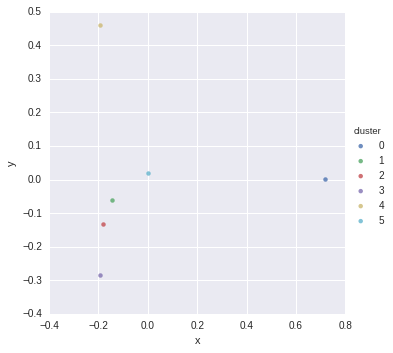

In [70]:
import seaborn as sns
sns.lmplot('x','y',data=PCA_object2, hue='cluster', fit_reg=False)
# PCA_object2['cluster'] = PCA_object2.index
# PCA_object2
# sns.FacetGrid

In [69]:
sns.lmplot?

In [ ]:
#which clustering gives you most meaningful interpretation